In [1]:
# import libraries

# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2  
import imghdr  # module to determine type or format of image files
import shutil
import random
import tensorflow as tf 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
custom_model_vgg16 = load_model("model_vgg16_01a.h5")

2023-09-20 14:56:49.864525: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-09-20 14:56:49.864808: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-09-20 14:56:49.864819: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-09-20 14:56:49.864904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-20 14:56:49.865401: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Handle ".DS_Store" issue from class names

def remove_hidden(folder_path: str):
    '''
    This function removes ".DS_Store" from the list to be returned.
    '''

    folder_list = os.listdir(folder_path)

    if ".DS_Store" in folder_list:
        folder_list = folder_list[1:]

    return folder_list

1/1 [==============================] - 0s 207ms/step


2023-09-20 14:57:05.884083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


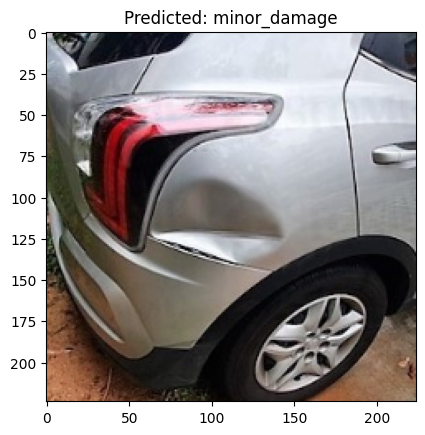

1/1 [==============================] - 0s 15ms/step


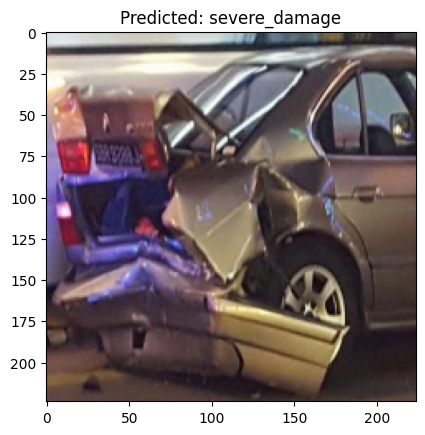

1/1 [==============================] - 0s 14ms/step


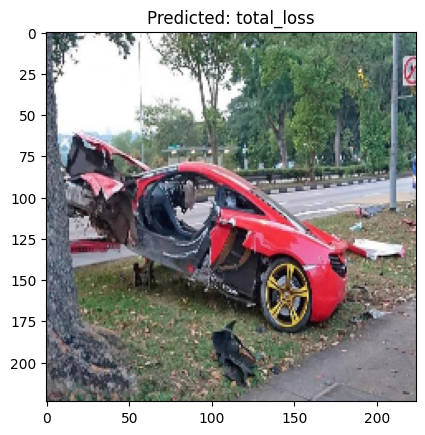

1/1 [==============================] - 0s 11ms/step


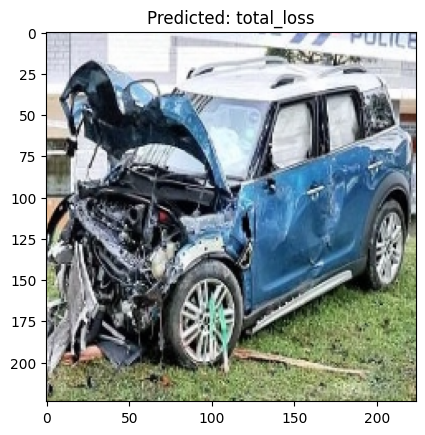

1/1 [==============================] - 0s 13ms/step


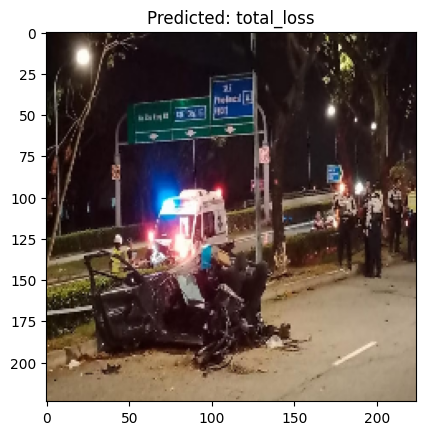

1/1 [==============================] - 0s 14ms/step


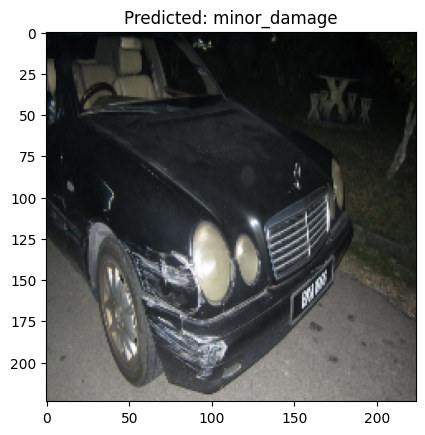

1/1 [==============================] - 0s 13ms/step


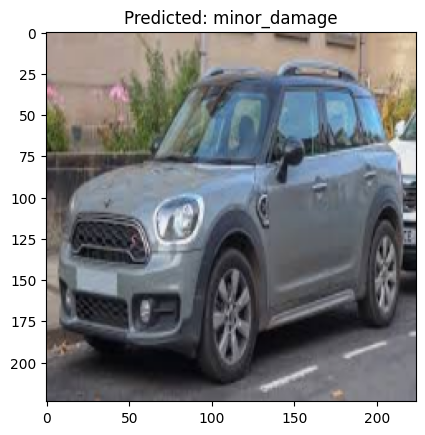

1/1 [==============================] - 0s 13ms/step


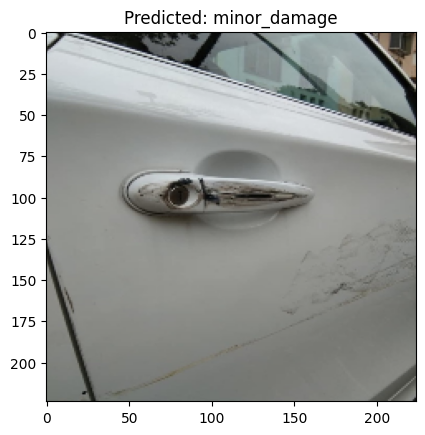

1/1 [==============================] - 0s 13ms/step


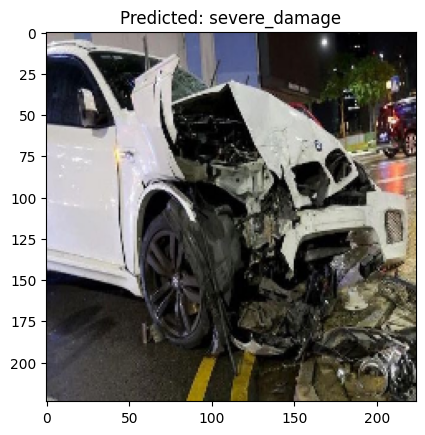

1/1 [==============================] - 0s 12ms/step


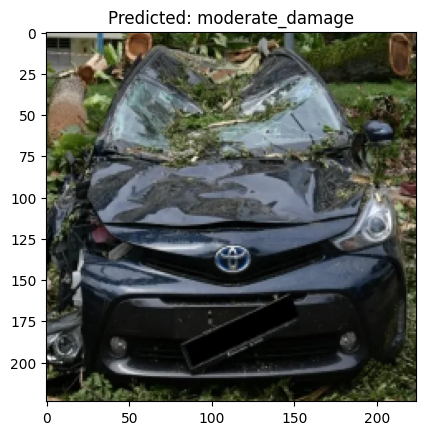

1/1 [==============================] - 0s 13ms/step


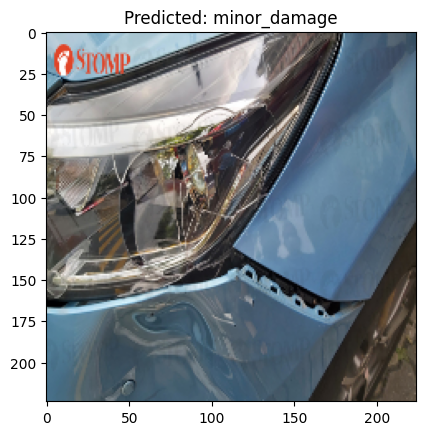

1/1 [==============================] - 0s 13ms/step


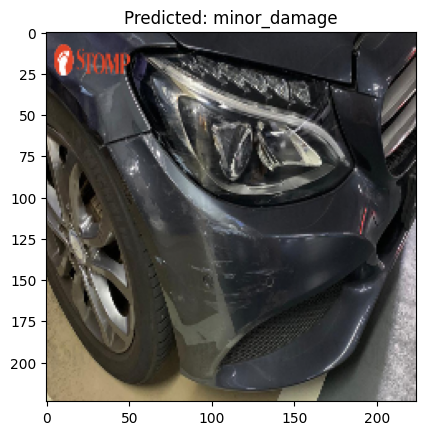

1/1 [==============================] - 0s 17ms/step


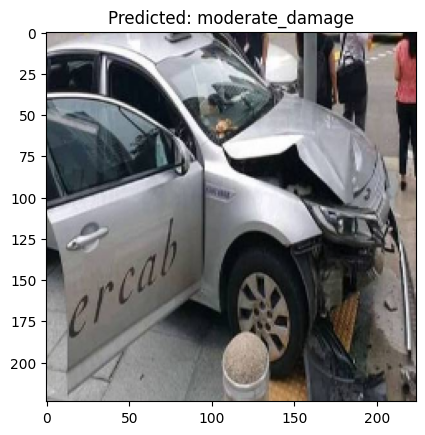

1/1 [==============================] - 0s 13ms/step


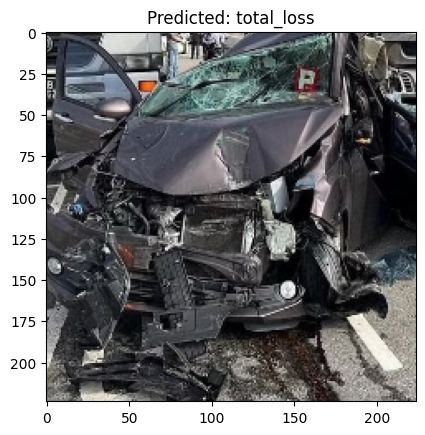

1/1 [==============================] - 0s 40ms/step


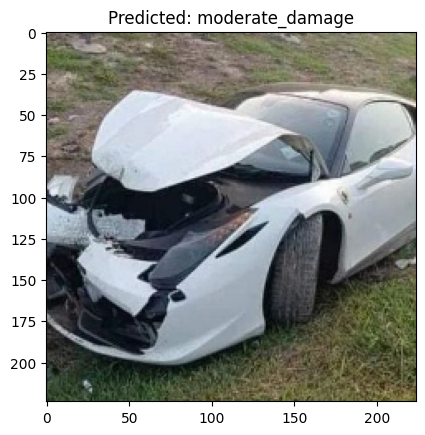

1/1 [==============================] - 0s 15ms/step


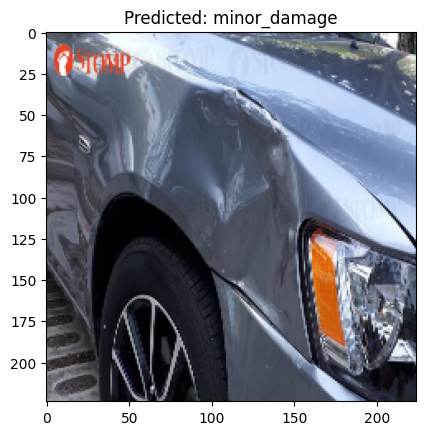

1/1 [==============================] - 0s 13ms/step


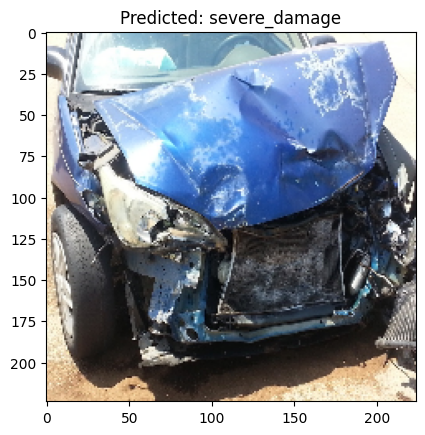

1/1 [==============================] - 0s 12ms/step


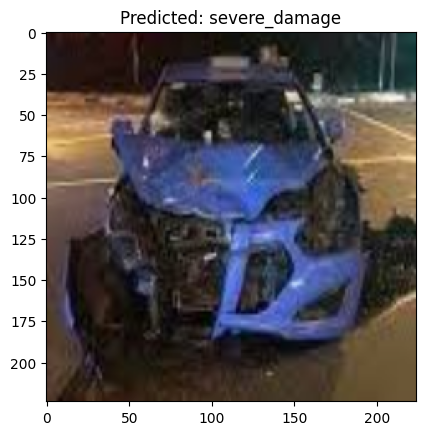

1/1 [==============================] - 0s 14ms/step


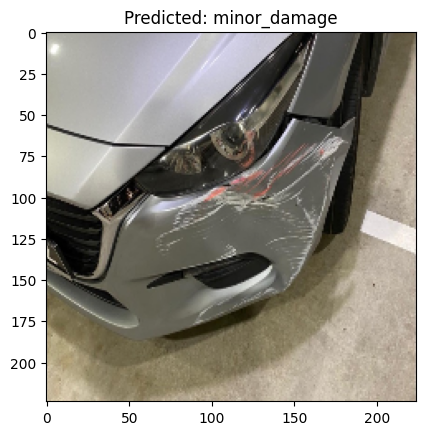

1/1 [==============================] - 0s 13ms/step


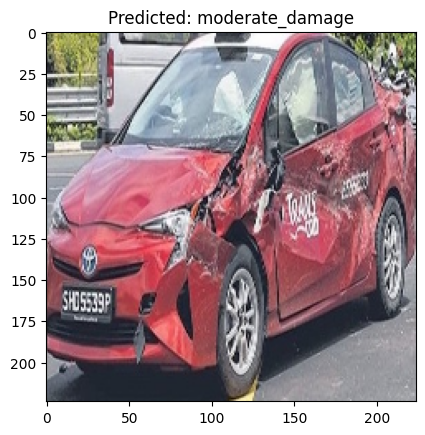

1/1 [==============================] - 0s 13ms/step


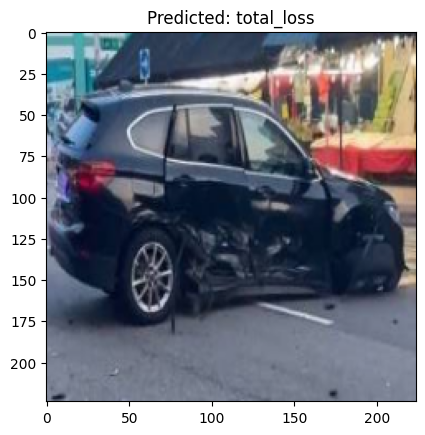

1/1 [==============================] - 0s 14ms/step


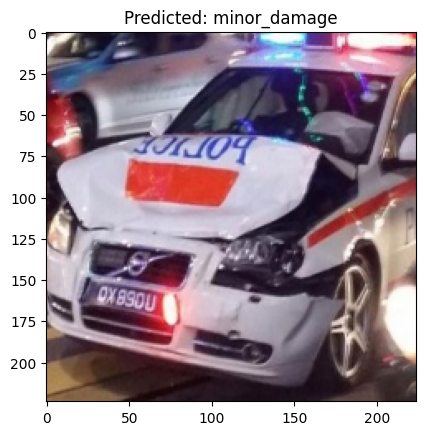

1/1 [==============================] - 0s 14ms/step


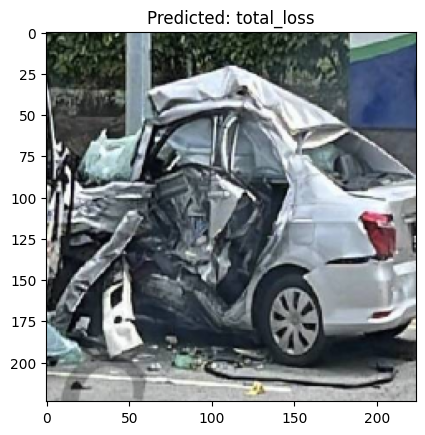

1/1 [==============================] - 0s 13ms/step


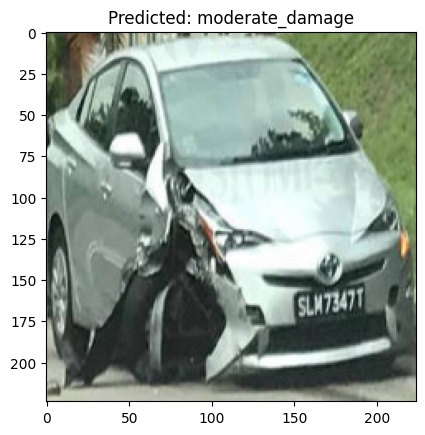

1/1 [==============================] - 0s 13ms/step


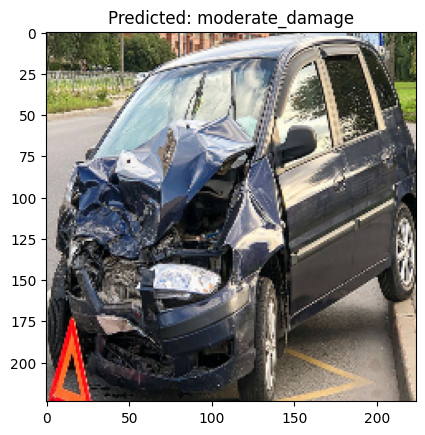

1/1 [==============================] - 0s 14ms/step


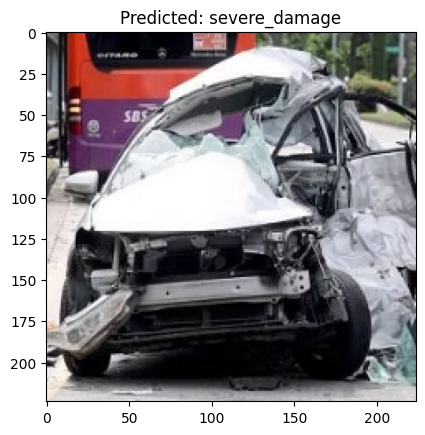

1/1 [==============================] - 0s 16ms/step


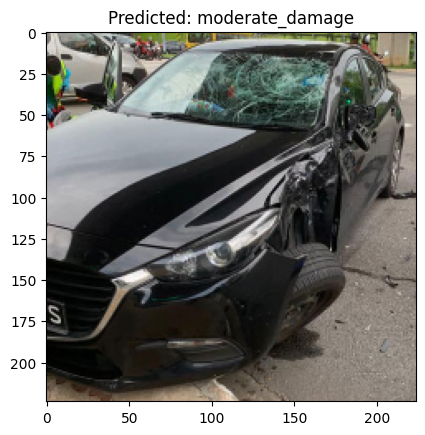

1/1 [==============================] - 0s 14ms/step


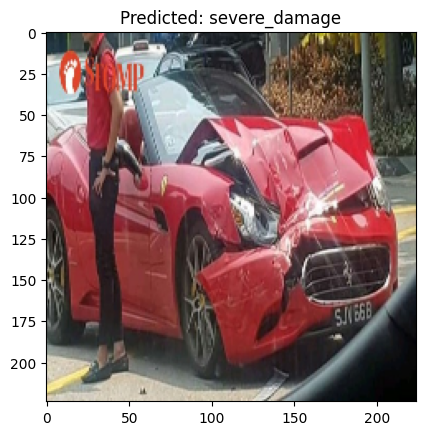

1/1 [==============================] - 0s 14ms/step


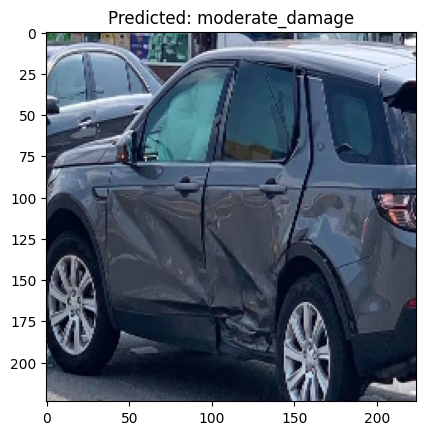

1/1 [==============================] - 0s 13ms/step


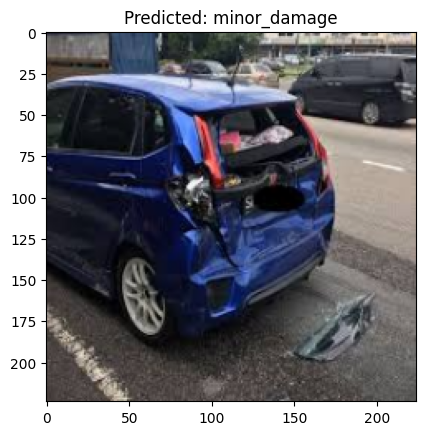

1/1 [==============================] - 0s 13ms/step


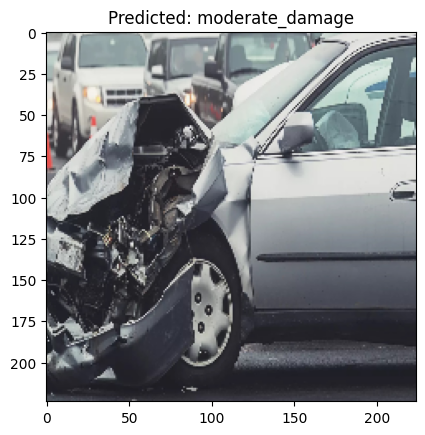

In [6]:
# Predict 

data_dir_path = "/Users/mckishiebombom/code/Kishendas123/car-damage-classification/raw-data"
class_names = remove_hidden(data_dir_path)


predict_dir = "/Users/mckishiebombom/code/Kishendas123/car-dam-sol/predict_02"
predict_list = remove_hidden(predict_dir)

# Loop through predict folder
for image in predict_list:
       
    # Read image
    image_path = os.path.join(predict_dir, image)
    image = cv2.imread(image_path)
    
    image = cv2.resize(image, (224, 224))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    # Predict
    image = np.expand_dims(image, axis=0)
    result = custom_model_vgg16.predict(image)
    
    # Print results
    plt.imshow(image_rgb)
    plt.title(f"Predicted: {class_names[np.argmax(result)]}")
    plt.show()
    # print(class_names[np.argmax(result)])

In [ ]:
class_names

['moderate_damage', 'no_damage', 'severe_damage', 'minor_damage', 'total_loss']

In [ ]:
predict_list

['car_28.jpg',
 'car_29.jpg',
 'car_15.jpg',
 'car_8.jpg',
 'car_9.jpg',
 'car_12.jpg',
 'car_13.jpg',
 'car_22.jpg',
 'car_23.jpg',
 'car_6.jpg',
 'car_4.jpg',
 'car_21.jpg',
 'car_34.jpg',
 'car_1.jpg',
 'car_18.jpg',
 'car_24.jpg',
 'car_30.jpg',
 'car_31.jpg',
 'car_25.jpg',
 'car_19.jpg',
 'car_2.jpg',
 'car_33.jpg',
 'car_26.jpg',
 'car_32.jpg',
 'car_3.jpg',
 'car_7 copy.jpg']